In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(
    df, title ="Pandas Profiling Report for Titanic train dataset"
)
profile.to_file("titanic_train_profiling.html")

/Users/hoangquocly/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/56/1921flkx7_g0hh5l6jptpsxw0000gn/T/ipykernel_5261/2576566771.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 472.07it/s]


# Preprocessing

## Drop columns and fill in missing values

In [4]:
df_forml = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_forml.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [5]:
# Fill with value that exist the most
df_forml['Embarked'].iloc[61] = 'S'
df_forml['Embarked'].iloc[829] = 'S'

/var/folders/56/1921flkx7_g0hh5l6jptpsxw0000gn/T/ipykernel_5261/2764997466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forml['Embarked'].iloc[61] = 'S'
/var/folders/56/1921flkx7_g0hh5l6jptpsxw0000gn/T/ipykernel_5261/2764997466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forml['Embarked'].iloc[829] = 'S'


In [6]:
df_forml['Age'][df_forml['Age'].isna()] = 0

/var/folders/56/1921flkx7_g0hh5l6jptpsxw0000gn/T/ipykernel_5261/3749280484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forml['Age'][df_forml['Age'].isna()] = 0


In [7]:
df_forml.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,0.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


## Feature engineering



In [8]:
df_forml = df_forml.join(pd.get_dummies(df_forml.Embarked, prefix='Embarked'))
df_forml = df_forml.join(pd.get_dummies(df_forml.Sex, columns=['male','female']))
df_forml

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,0,1,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,1,1,0
888,0,3,female,0.0,1,2,23.4500,S,0,0,1,1,0
889,1,1,male,26.0,0,0,30.0000,C,1,0,0,0,1


In [9]:
df_forml.drop(columns=['Sex','Embarked'], inplace=True)
df_forml.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [10]:
df_forml['Age'] = df_forml['Age']/(df_forml['Age'].max())
df_forml['Fare'] = df_forml['Fare']/(df_forml['Fare'].max())

# Split data and Train model

In [11]:
from sklearn.model_selection import train_test_split
X = df_forml.drop(columns=['Survived'])
y = df_forml['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [12]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(random_state=0).fit(X_train, y_train)
y_LR = model_LR.predict(X_test)
print(list(y_LR)[:10])
print(list(y_test)[:10])

[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 0, 0, 1, 1, 1, 1, 0, 1, 1]


In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_LR))

0.7892376681614349


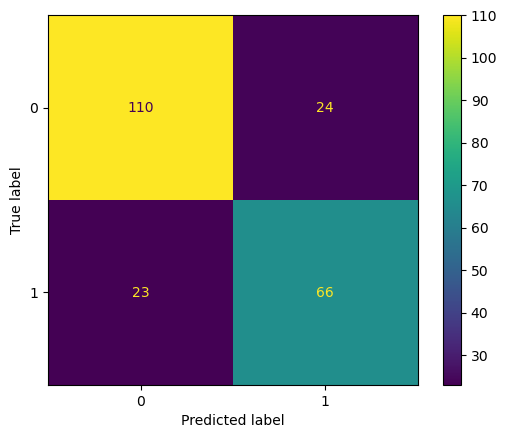

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_LR, labels = model_LR.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                        display_labels = model_LR.classes_)
disp.plot()
plt.show()

0.8116591928251121


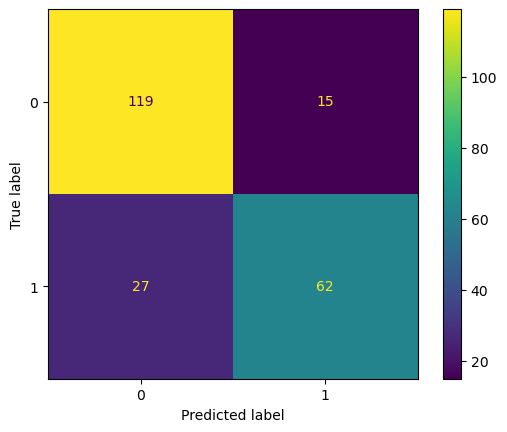

In [15]:
from sklearn.svm import SVC
model_SVC = SVC(random_state=0).fit(X_train, y_train)
y_SVC = model_SVC.predict(X_test)
print(accuracy_score(y_test, y_SVC))
cm = confusion_matrix(y_test, y_SVC, labels = model_SVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_SVC.classes_)
disp.plot()
plt.show()

0.8026905829596412


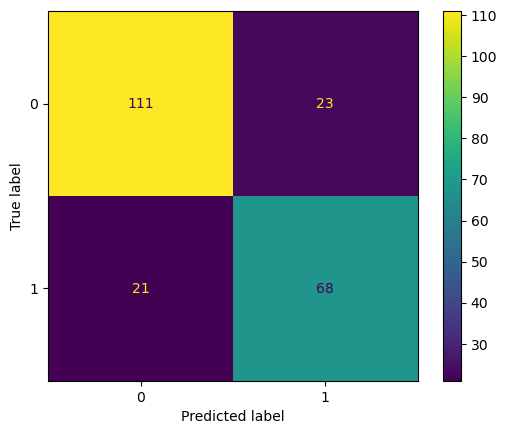

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_RF = model_RF.predict(X_test)
print(accuracy_score(y_test, y_RF))
cm = confusion_matrix(y_test, y_RF, labels= model_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                        display_labels = model_RF.classes_)
disp.plot()
plt.show()

0.8026905829596412


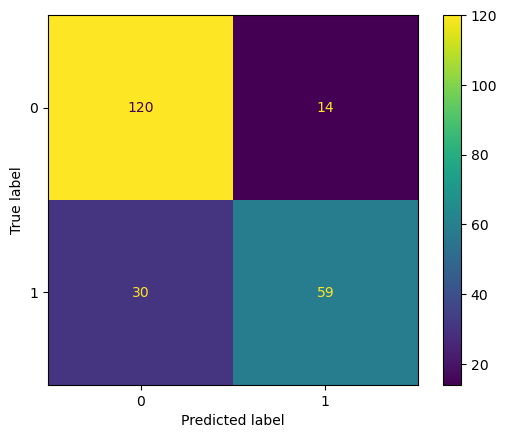

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)
y_GB = model_GB.predict(X_test)
print(accuracy_score(y_test,y_GB))
cm = confusion_matrix(y_test, y_GB, labels = model_GB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_GB.classes_)
disp.plot()
plt.show()